# Project: Investigate Dataset 'No-show Appointments'

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset presents information on patients medical appointments in Brazil and it focuses on whether or not patients honoured their appointments. I will be glad to identify which variable when improved will increase patients show-up to appointments

>Below is a list of the column names found in this dataset:
>1. PatientId: Patient Identification Number
>2. AppointmentID: Identification Number for Appointment
>3. Gender: Sex of Patient
>4. ScheduledDay: Date for when a Patient called hospital to book the Appointment Date
>5. AppointmentDay: Appointment Date for Patient
>6. Age: Patient's Age in years
>7. Neighbourhood: Location of the Hospital
>8. Scholarship: For Patient enrolled on Brasilian Welfare Program
>9. Hypertension: Health Condition of a Patient
>10. Diabetes: Health Condition of a Patient
>11. Alcoholism: Health Condition of a Patient
>12. Handicap: Health Condition of a Patient 
>13. SMS_received: Text message receive by Patient
>14. No-show: Patient's show-up or no-show to appointment 


### Question(s) for Analysis
>1. Find out percentage of Patients who showed-up as well as those who didn't show-up for their appointment
>2. Find out whether there are differences in the categorical variables on the target variable
>3. Which of the medical conditions have the most show-up and no-show-up to appointment
>4. Which day of the week and month had the most no-show/show-up to appointment
>5. What is the Age distribution and how does it refelect on the target variable
>6. Which variable should be a focus in order to improve Patients show-up to appointment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import calendar
import plotly.express as px

<a id='wrangling'></a>
## Data Wrangling

> I will undertake the following actions under this subject;
>>1. Load in the No-show Appointments Data into my Notebook and read the head
>>2. Generate some basic information on the Data
>>3. Clean data 

In [2]:
# import no show appointments.csv and read the head data
df=pd.read_csv(r'C:\Users\Isaac Ninson\Desktop\Python Work\My_Udacity_Project\noshowappointments-kagglev2-may-2016.csv')
df.head()   

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# checking the number of rows and columns
df.shape

(110527, 14)

In [4]:
#Identifying column names
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [5]:
# check data tyoe of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
#Check for missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
# checking for data duplication
print(sum(df.duplicated()))

0


In [8]:
# summary statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
#Age has unrealistic values like -1 and 0. It also has values beyond 100. I will check counts for Age
print(df.groupby(['Age']).size())

Age
-1         1
 0      3539
 1      2273
 2      1618
 3      1513
        ... 
 98        6
 99        1
 100       4
 102       2
 115       5
Length: 104, dtype: int64


In [10]:
#Check number of unique values for the columns
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

### Observations
>1. Data has 110527 rows and 14 columns
>2. Columns names has spelling mistakes for 'Hipertension' which should be 'Hypertention' and 'Handcap' which should be 'Handicap')
>3. There are no missing values
>4. The following variables; Scholarship, Hipertension, Diabetes, Alcoholism, Handcap and SMS_received are integers instead of Boolean
>5. There are no duplication of data
>6. The 'Age' column contains some unrealistic values like 0 and -1 and also has few values beyond 100
>7. Handicap has 5 unique values and since this is a categorical variable just like the other Health Condition variable, I need to investigate this further since the other Health Condition Variables have 2 unique values each
>8. ScheduledDay and AppointmentDay are string data instead of datetime


### Data Cleaning
I will perform the below activities to clean data for Exploratory
>1. Correct spelling mistakes in the columns names 'Hipertension' and 'Handcap'
>2. Delete data with unrealistic Age value -1  and greater than 100. Convert data with age value 0 to age value 1
>3. Convert Handicap unique values to two(2) values
>4. Convert the following variables; Scholarship, Hypertension, Diabetes, Alcoholism, Handicap and SMS_received to Boolean
>5. Convert ScheduledDay and AppointmentDay to datetime data
>6. Add the following columns to my data to help answer some of my question;'Weekday_Scheduled', 'Month_Scheduled', 'Year_Scheduled', 'Weekday_Appointed', 'Month_Appointed' and 'Year_Appointed'

In [11]:
#correct spelling mistakes and inconsistent order of capturing column name and confirm it has been corrected
df.rename(columns = {'Hipertension':'Hypertension', 'Handcap':'Handicap', }, inplace = True)
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show'],
      dtype='object')

In [12]:
#Dropping unrealistic values and outliers for Age and confirm it has been effected
df.drop(df[df['Age']==-1].index,inplace=True)
df.drop(df[df['Age']>100].index,inplace=True)
df.loc[df.Age == 0, 'Age'] = 1
print(df.groupby(['Age']).size())

Age
1      5812
2      1618
3      1513
4      1299
5      1489
       ... 
96       17
97       11
98        6
99        1
100       4
Length: 100, dtype: int64


In [13]:
#checking the count for the unique values of Handicap to investigate further
df['Handicap'].value_counts()

0    108282
1      2038
2       183
3        13
4         3
Name: Handicap, dtype: int64

In [14]:
#Given that the unique value 0 has a very high count, it will be assumed that counts for the unique values 2,3 and 4 were to be for unique value 1.
#I shall then add the counts for the unique values 2,3 and 4 to that of unique value 1 during the data cleaning process

In [15]:
#Convert all Handicap values greater than 0 to 1 and check it has been effected
df.loc[df.Handicap > 0, 'Handicap'] = 1
print(df['Handicap'].unique())

[0 1]


In [16]:
#convert columns to boolean
df = df.astype({'Scholarship': bool, 'Hypertension': bool, 'Diabetes':bool, 'Alcoholism':bool,'Handicap':bool,'SMS_received':bool})

In [17]:
#converting ScheduledDay and AppointmentDay to datetime
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])

In [18]:
#confirming conversions of data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110519 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110519 non-null  float64            
 1   AppointmentID   110519 non-null  int64              
 2   Gender          110519 non-null  object             
 3   ScheduledDay    110519 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110519 non-null  datetime64[ns, UTC]
 5   Age             110519 non-null  int64              
 6   Neighbourhood   110519 non-null  object             
 7   Scholarship     110519 non-null  bool               
 8   Hypertension    110519 non-null  bool               
 9   Diabetes        110519 non-null  bool               
 10  Alcoholism      110519 non-null  bool               
 11  Handicap        110519 non-null  bool               
 12  SMS_received    110519 non-null  bool               
 13  No-show       

In [19]:
#Adding Weekday and Month as additional columns  for the weekday and Month when Appointment took place and checking if it has been effected
df['Weekday_Appointed']=df['AppointmentDay'].dt.dayofweek
df['Month_Appointed']=df['AppointmentDay'].dt.month
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Weekday_Appointed,Month_Appointed
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,False,False,No,4,4
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,False,False,No,4,4
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,False,False,No,4,4
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,False,False,False,False,False,False,No,4,4
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,False,False,No,4,4


In [20]:
#checking number of row and columns after data cleaning
df.shape

(110519, 16)

In [21]:
#Data row has been reduced to 110,519 and 16 columns since I have deleted 2 unrealistic and outlier Ages and also introduced 6 new columns

In [22]:
#Data is now ready for Exploratory Analysis

<a id='eda'></a>
## Exploratory Data Analysis
### Research Question 1 - Percentage of Patients who showed-up to the Appointment as well as those who didn't

In [24]:
#Defining a function called percentage which returns percentage value for Patients counts on the categorical data
def percentage(column_name):print((df[column_name].value_counts(normalize=True))*100)
    
#Determine percentage of patients who showed-up as well as those that didn't show-up for their appointment
percentage('No-show')

No     79.807997
Yes    20.192003
Name: No-show, dtype: float64


Approximately 80% of patients showed-up for the appointment and 20% didn't

### Question 2 & 3- Finding out differences in the categorical variables on the target variable and which health condition recorded the highest show-up to Appointment

In [25]:
#Defining a function called graph which returns a bar graph of No-show Appointments grouped by the other columns
def graph(column_name):print((pd.crosstab(df[column_name],df['No-show'])).plot(kind='bar',figsize=(4,4)))

AxesSubplot(0.125,0.11;0.775x0.77)


Text(0, 0.5, 'Frequency')

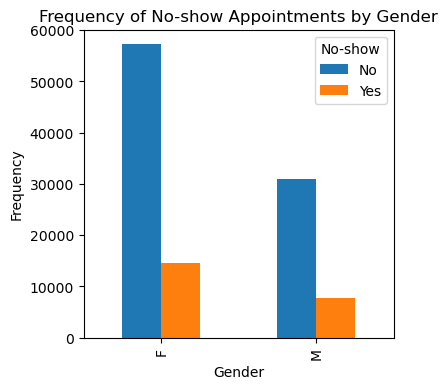

In [26]:
#Bar graph of No-show Appointments grouped by Gender
graph('Gender')
plt.title('Frequency of No-show Appointments by Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')

From the graph;
1. Female Patients recorded the highest in both show-up and no-show to appointments
2. Difference between Female and Male show-up to appointments is higher than the difference between their no-show

AxesSubplot(0.125,0.11;0.775x0.77)


Text(0, 0.5, 'Frequency')

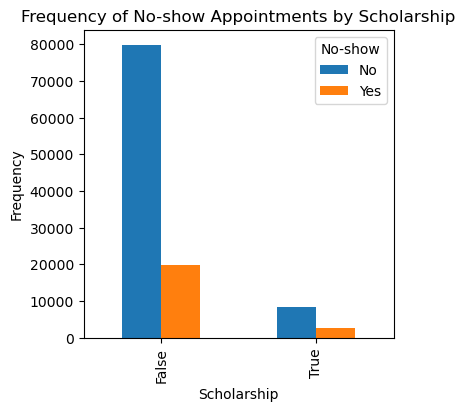

In [28]:
graph('Scholarship')
plt.title('Frequency of No-show Appointments by Scholarship')
plt.xlabel('Scholarship')
plt.ylabel('Frequency')

From the graph;
1. Patients who are enrolled on Brasilian Welfare Programe recorded low show-up as well as no-show to appointments compared to Patients not enrolled.
2. A vast majority of the Patients haven't been enrolled on the Welfare Programe

AxesSubplot(0.125,0.11;0.775x0.77)


Text(0, 0.5, 'Frequency')

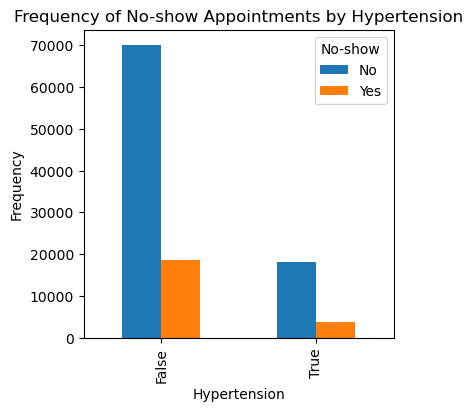

In [29]:
graph('Hypertension')
plt.title('Frequency of No-show Appointments by Hypertension')
plt.xlabel('Hypertension')
plt.ylabel('Frequency')

From the graph;
1. Non-hypertensive Patients are more than Hypertensive Patients
2. Non-Hypertensive Patients recorded the highest show-up as well as no-show to appointments
3. Number of Non-Hypertensive Patients who didn't show-up to appointments is almost same as Hypertensive Patients who showed-up to appointments

AxesSubplot(0.125,0.11;0.775x0.77)


Text(0, 0.5, 'Frequency')

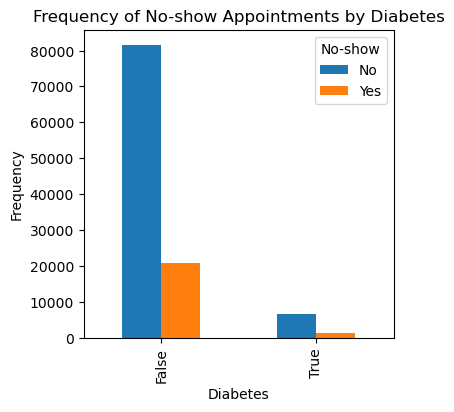

In [30]:
graph('Diabetes')
plt.title('Frequency of No-show Appointments by Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Frequency')

From the graph;
1. Non-Diabetic Patients were more than Diabetic Patients
2. Diabetic Patients recorded low show-up as well as no-show to appointments compared to Non-Diabetic Patients

AxesSubplot(0.125,0.11;0.775x0.77)


Text(0, 0.5, 'Frequency')

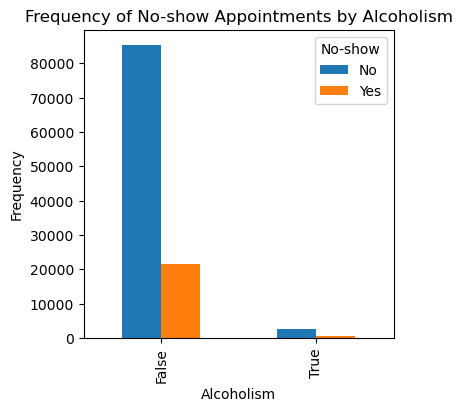

In [31]:
graph('Alcoholism')
plt.title('Frequency of No-show Appointments by Alcoholism')
plt.xlabel('Alcoholism')
plt.ylabel('Frequency')

From the graph;
1. Non-Alcoholic Patients were more than Alcoholic Patients
2. Alcoholic Patients recorded very low show-up as well as no-show to appointments compared to Non-Alcoholic Patients

AxesSubplot(0.125,0.11;0.775x0.77)


Text(0, 0.5, 'Frequency')

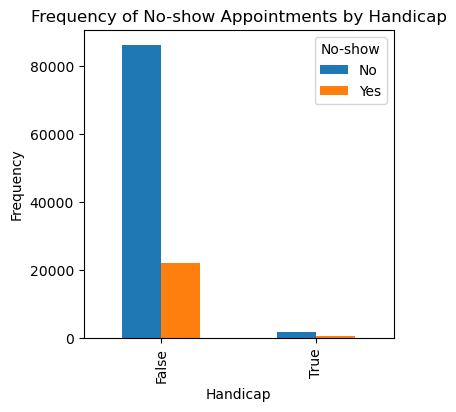

In [32]:
graph('Handicap')
plt.title('Frequency of No-show Appointments by Handicap')
plt.xlabel('Handicap')
plt.ylabel('Frequency')

From the graph;
1. Non-Handicap Patients were more than Handicap Patients
2. Handicap Patients recorded very low show-up as well as no-show to appointments compared to Non-Handicap Patients

AxesSubplot(0.125,0.11;0.775x0.77)


Text(0, 0.5, 'Frequency')

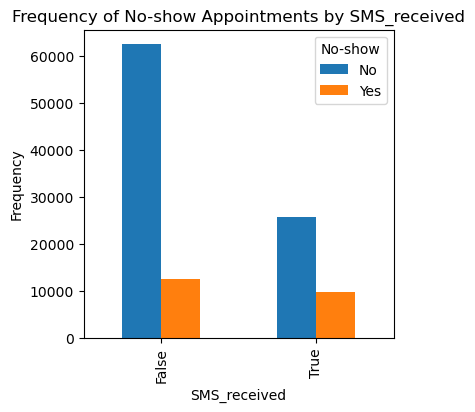

In [33]:
graph('SMS_received')
plt.title('Frequency of No-show Appointments by SMS_received')
plt.xlabel('SMS_received')
plt.ylabel('Frequency')

From the graph;
1. Patients who didn't received SMS were more than Patients who received.
2. Patients who didn't receive SMS recorded high show-up as well as no-show to appointments compared to those who received.
3. Difference between no-show to appointments for both Patients group is low compared to show-up to appointments

To answer questions 2 & 3;
1. There are more significant differences in the categorical variables in relation to no-show and showed-up to appointment
2. Hypertensive Patients have the most show-up as well as the most no-show to their appointments. 

### Question 4- Which day of the week and month of the year recorded the highest show-up to Appointment

AxesSubplot(0.125,0.11;0.775x0.77)


Text(0, 0.5, 'Frequency')

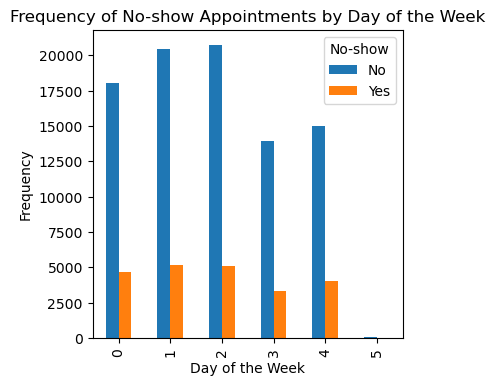

In [38]:
#Plotting bar graph for crosstable of day of the week and No-show Appointments, with Monday=0 and Sunday=6 
graph('Weekday_Appointed')
plt.title('Frequency of No-show Appointments by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')

From the graph
1. Wednesday had the highest show-up at Appointments by Patients.
2. Frequency of Patients show-up to Appointments rises from Tuesday, peak at Wednesday and decline.
3. Saturday recorded the lowest show-up as well as no show to appointments

AxesSubplot(0.125,0.11;0.775x0.77)


Text(0, 0.5, 'Frequency')

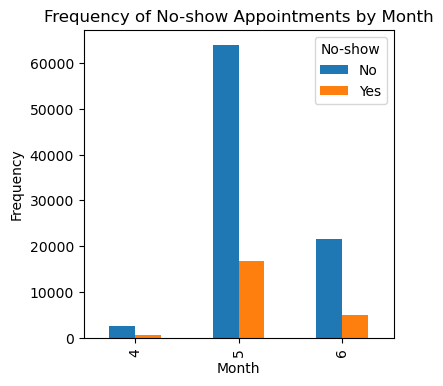

In [39]:
#Plotting bar graph for crosstable of month and No-show with January=1 and December=12
graph('Month_Appointed')
plt.title('Frequency of No-show Appointments by Month')
plt.xlabel('Month')
plt.ylabel('Frequency')

Per the grapgh, the month of May had the highest number of show-up to Appointments by Patients, followed by June.

### Question 5 - Age Distribution

Text(0.5, 1.0, 'Frequency of Age')

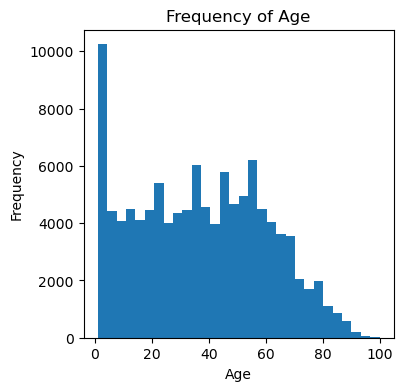

In [40]:
#Plot histogram for Age
df['Age'].plot(kind='hist',bins=30,figsize=(4,4))
plt.xlabel('Age')
plt.title('Frequency of Age')

From the histogram above;
1. Patients' Age is skewed towards the right
2. Ages at the extreme ends recorded the very highest(to the left) as well as the lowest(to the right) frequencies

Text(0.5, 1.0, 'Patients Distrbution by Age')

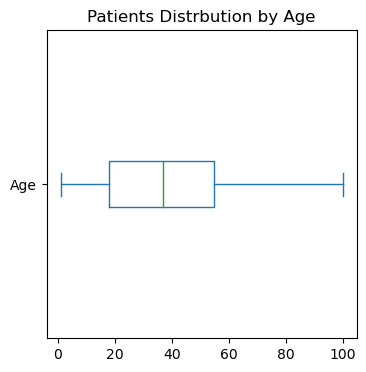

In [41]:
#Plot a box chart for Age
df['Age'].plot(kind='box',figsize=(4,4),vert=False)
plt.title('Patients Distrbution by Age')

The box plot shows that Age is skewed towards the right. 
It is observed that larger proportion of the Patients are aged below 60 years

In [43]:
#Grouping Age into four groups i.e Less than 36, 36-55, 56-80 and beyond 80
bins= [1,36,56,81,100]
labels = ['Less than 36','36-55','56-80','More than 80']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df.groupby(['AgeGroup'])['PatientId'].count()

AgeGroup
Less than 36    53003
36-55           30019
56-80           24652
More than 80     2841
Name: PatientId, dtype: int64

The table above indicates most of the Patients were below the Age 36 followed by 36 to 50 years

AxesSubplot(0.125,0.11;0.775x0.77)


Text(0, 0.5, 'Frequency')

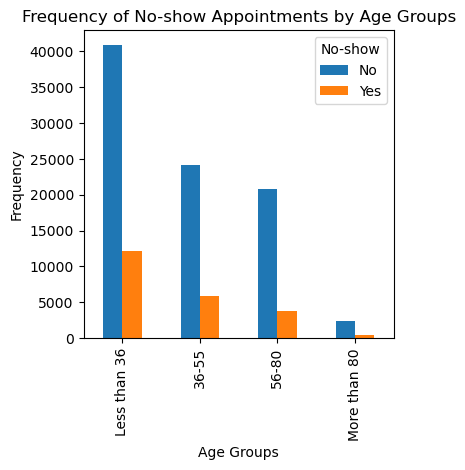

In [46]:
graph('AgeGroup')
plt.title('Frequency of No-show Appointments by Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Frequency')

From the graph;
1. Patients aged below age 36 had the highest show-up to appointments and at the sametime the highest in no-show to appointments
2. The frequency of show-up or no-show to appointments turns to decrease as the Age Group increases

### Other Analysis

In [34]:
#Crosstable for SMS_received and No-show
pd.crosstab(df['SMS_received'],df['No-show'],normalize='index')*100

No-show,No,Yes
SMS_received,,
0,83.296689,16.703311
1,72.425455,27.574545


In [47]:
percentage('SMS_received')

False    67.896018
True     32.103982
Name: SMS_received, dtype: float64


<a id='conclusions'></a>
## Conclusions

>1. Out of the total of 110,519 records of Patients No-Appointments Data, after data cleaning, 80% showed-up to their Appointment. 

>2. 72% of Patients who received SMS showed-up for the Appointment. This implies that should Hospitals focus much on sending and ensuring receipt of SMS, Patient will show-up for their Appointment.
>3. Approximately 68% of Patients didn't received SMS. Investigating this further will enable Hospitals to determine actions needed to improve on this. 

> limitation: To enable Hospitals improve on Patient show-up to Appointment, one key factor that has to be considered and improved upon is the receipt of SMS by Patients. The data lack further details relating to whether SMS were really sent but wasn't delivered or was sent and delivered but Patient didn't receive it due to some other factors.

### Reference
>1. https://datagy.io/pandas-crosstab/
>2. https://www.geeksforgeeks.org/using-pandas-crosstab-to-create-a-bar-plot/
>3. https://stackoverflow.com/questions/18500011/horizontal-box-plots-in-matplotlib-pandas
>4. https://www.futurelearn.com/info/courses/data-science-artificial-intelligence/0/steps/146177